In [38]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats

6.622687962616162


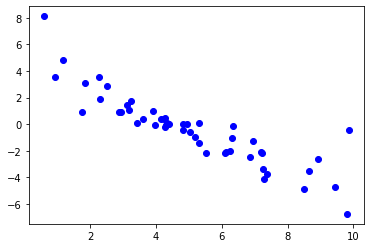

In [47]:
#Llamamos los datos que queremos ajustar:
np.load('fit_exercise.npy')       
(x,y,error) = np.load('fit_exercise.npy')

#x=np.array([0,1,2,3,4])
#y=np.array([0,0.5,1,1.5,2])

#La varinza de y (el eje vertical) está dada por sigma
sigma=np.var(y)

plt.scatter(x, y, color='blue')

print(sigma)

[ 4.54856943 -0.97619482]


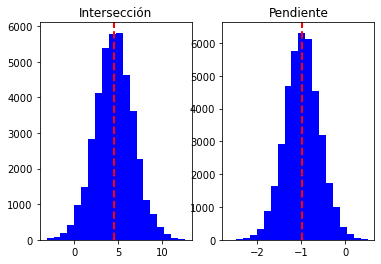

In [51]:
#Definimos un prior plano:
def prior():
    if sigma <= 0:
        return 0.0
    return 1

#Para el likelihood, usamos la distribución Gaussiana, como es requerido en el algoritmo metrópolis
#Trabajamos con logaritmos de las cantidades. La intersección de la recta es a, la pendiente es b.
def likelihood(beta):
    a = beta[0]     # intersección
    b = beta[1]     # pendiente
    #El modelo a los que ajustaremos los datos está dado por y_modelo
    y_modelo = a  + b * x
    likelihoods=-0.5*np.sum(np.log(2*np.pi*sigma**2)+(y-y_modelo)**2/(sigma**2))
    return likelihoods

#Formamos el posterior a partir del prior y el likelihood
def posterior(beta):
    return likelihood(beta) - np.log(prior())


#Saltamos entre parámetros con una función gaussiana centrada en los parámetros
def funcion(beta):
    a = beta[0]
    b = beta[1]
    a_new = np.random.normal(a, 0.5)
    b_new = np.random.normal(b, 0.5)
    beta_new = [a_new, b_new]
    return beta_new

#Ejecutamos el algoritmo
beta_0 = [0.5, 0.5]        # valores iniciales de los parámetros
resultados = np.zeros([50000,2])            # arreglo para registrar los resultados
resultados[0,0] = beta_0[0]
resultados[0, 1] = beta_0[1]
for step in range(1, 50000):               #  50000 veces

    beta_old = resultados[step-1, :]
    beta_prop = funcion(beta_old)

    prob = np.exp(posterior(beta_prop) - posterior(beta_old))

    if np.random.uniform(0,1) < prob:
        resultados[step, :] = beta_prop    
    else:
        resultados[step, :] = beta_old         

burn_in = 10000
beta_posterior = resultados[burn_in:, :]
print(beta_posterior.mean(axis=0))

fig = plt.figure()
ax1 = fig.add_subplot(121)
ax1.hist(beta_posterior[:,0], bins=20, color='blue')
ax1.axvline(beta_posterior.mean(axis=0)[0], color='red', linestyle='dashed', linewidth=2)
ax1.title.set_text('Intersección')
ax2 = fig.add_subplot(122)
ax2.hist(beta_posterior[:,1], bins=20, color='blue')
ax2.axvline(beta_posterior.mean(axis=0)[1], color='red', linestyle='dashed', linewidth=2)
ax2.title.set_text('Pendiente')
plt.show()